In [1]:
import gkw
import derivative
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

rc('text', usetex=True)
rc('font', family='serif', size=22)

In [3]:
# File import
data = 'S6_rtl6.0'
filename = '../data/'+data+'/gkwdata.h5'
f = h5py.File(filename,"r+")

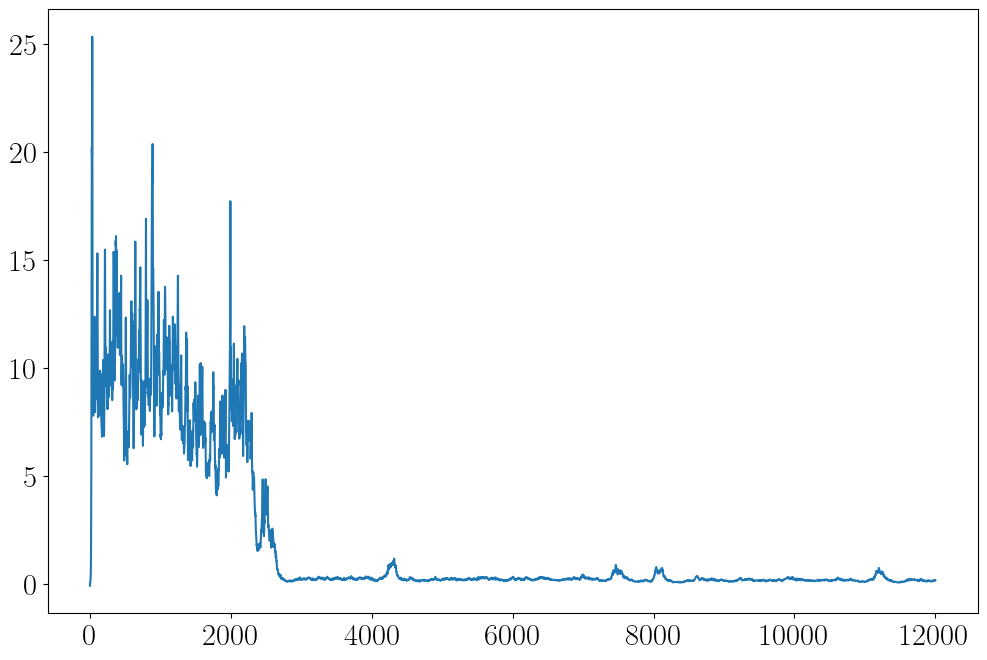

In [21]:
# Heat flux
eflux_data, time = gkw.get_eflux_from_hdf5_file(f)
plt.plot(time[0], eflux_data)

plt.savefig('../pictures/'+data+'/'+data+'_eflux.pdf', bbox_inches='tight')

In [10]:
# Elektrostatic potencial
phi = f[gkw.find_key(f, 'phi')][()]
nx = phi.shape[0]

In [11]:
# Mean over y to get a approximation for the zonal potenzial
zonal_pot = np.mean(phi,1)

In [12]:
# Finite Differnece for shearing rate omega_ExB

# Stepsize
rad_boxsize = f[gkw.find_key(f, 'lxn')][()][0]
rad_coord = f[gkw.find_key(f,'xphi')][0,:]
dx = rad_boxsize/nx

print(rad_boxsize, dx)

76.27048929506829 0.595863197617721


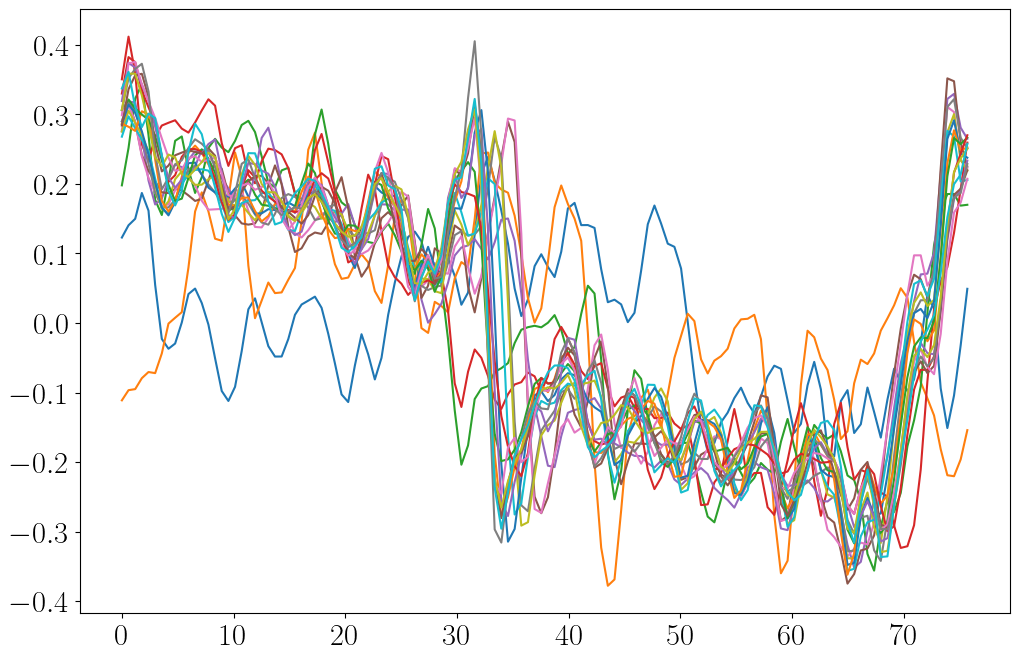

In [17]:
# Plot all
start, end = 0, 999 

gkw.plot_shearing_rate_wexb_all(rad_coord, zonal_pot, dx, start, end)
    
plt.savefig('../pictures/'+data+'/'+data+'_wexb_all.pdf', bbox_inches='tight')

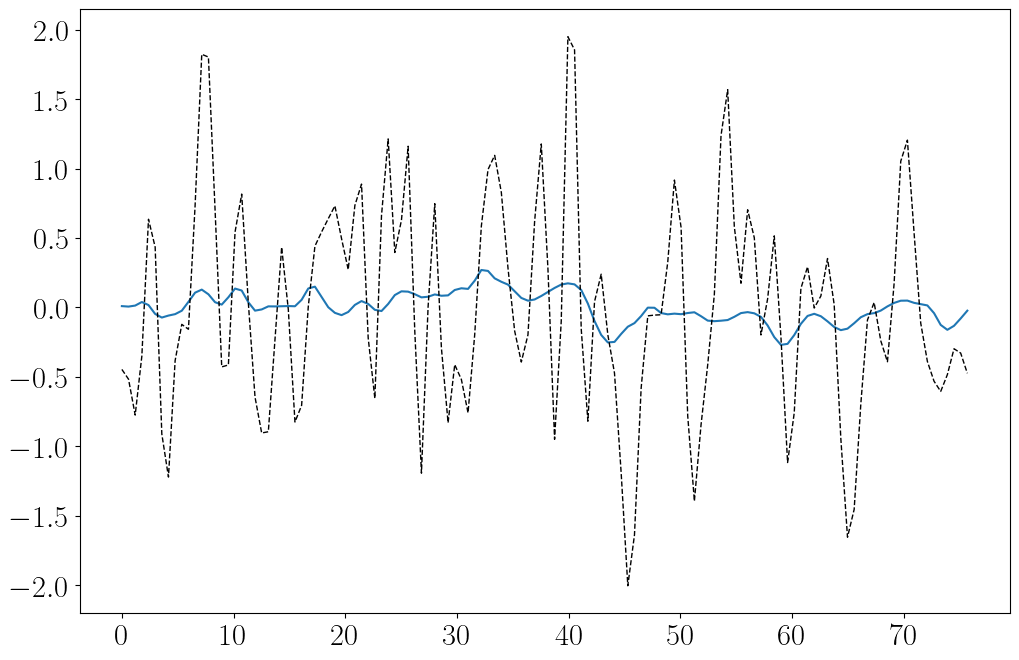

In [18]:
# Plot from 500:2000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (1250)
start, end = 500, 2000

gkw.plot_shearing_rate_wexb_interval(rad_coord, zonal_pot, dx, start, end)

plt.savefig('../pictures/'+data+'/'+data+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

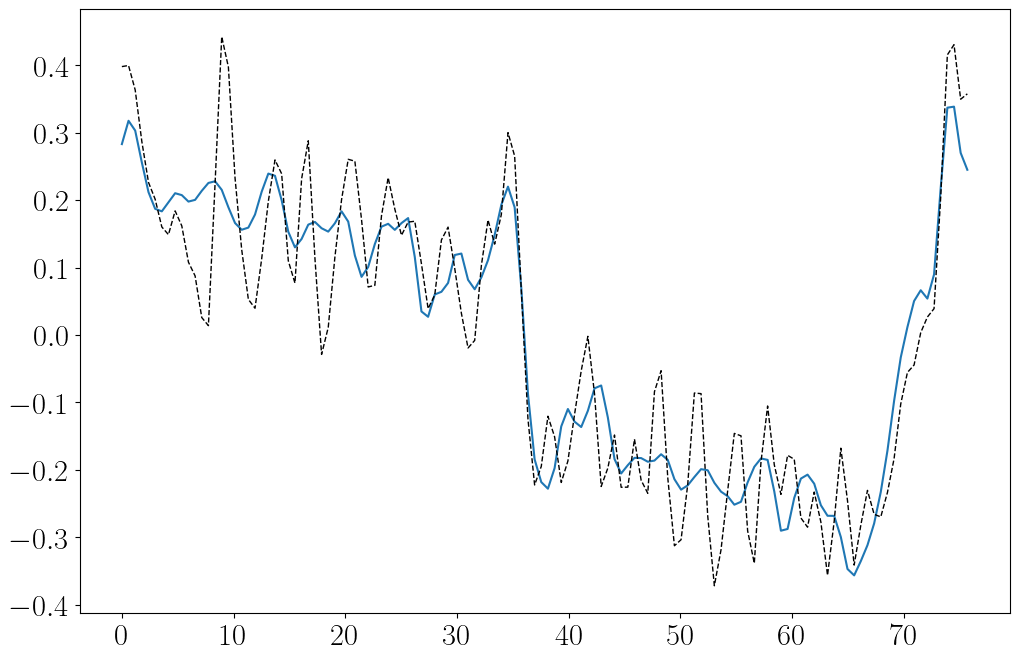

In [19]:
# Plot from 4000:6000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (5000)
start, end = 4000, 6000

gkw.plot_shearing_rate_wexb_interval(rad_coord, zonal_pot, dx, start, end)

plt.savefig('../pictures/'+data+'/'+data+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

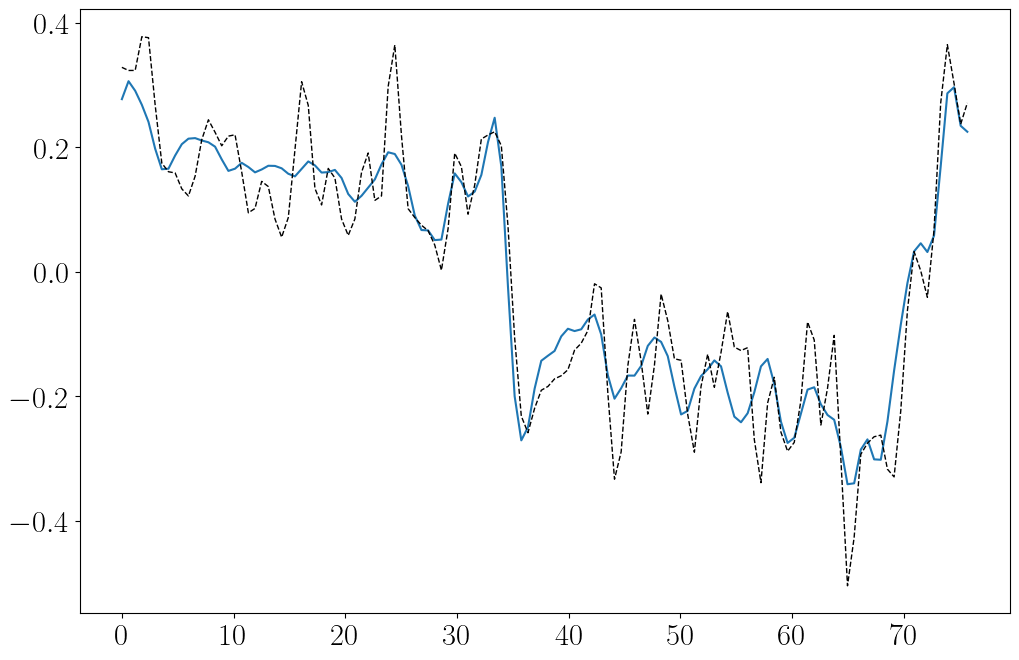

In [20]:
# Plot from 7000:10000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (8500)
start, end = 7000, 10000

gkw.plot_shearing_rate_wexb_interval(rad_coord, zonal_pot, dx, start, end)

plt.savefig('../pictures/'+data+'/'+data+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')